### Load and plot data

As the first step, we will load the data from a CSV file using the pandas library. We assume that the data has already made machine readable and maybe even partly cleaned. This is usually a huge effort in data intensive projects!

In [1]:
import pandas as pd

# Load the data from a CSV file
# file_path = r"C:\tmp\daten_bereinigt_v2.csv"
# data = pd.read_csv(file_path, sep=';')

# file_path = "data\synthetic_data.csv"
file_path = r"C:\Users\ewalda\OneDrive - NORDAKADEMIE\shared\Lehre\24_WPM_KI_BSc\datenerhebung\2024_11_20_wpm_ki_daten.csv"
data = pd.read_csv(file_path, sep=';', index_col=0)



In [3]:
data.head()

data.shape


(21, 12)

### Data Overview

We will use this dataset to perform various analyses and visualizations. For instance, we will create a scatter plot to visualize the relationship between `Koerpergroesse` (height) and `Schuhgroesse` (shoe size).

In [ ]:
import matplotlib.pyplot as plt

# Define the variables
xlabel = 'Koerpergroesse' # independent variable
ylabel = 'Schuhgroesse'    # dep. variable / target / ground truth

x = data[xlabel]
y = data[ylabel]


In [5]:
print(x)
print(y)

# 
1     188
2     178
3     192
4     178
5     193
6     167
7     167
8     185
9     181
10    190
11    173
12    182
13    183
14    197
15    182
16    187
17    195
18    190
19    180
20    178
21    190
Name: Koerpergroesse, dtype: int64
# 
1     45.0
2     44.0
3     44.0
4     44.0
5      NaN
6     38.0
7     40.0
8     43.0
9     45.0
10    47.0
11    43.0
12    43.0
13    43.0
14    47.0
15    42.0
16    47.0
17    46.0
18    47.0
19    43.0
20    45.0
21    47.0
Name: Schuhgroesse, dtype: float64


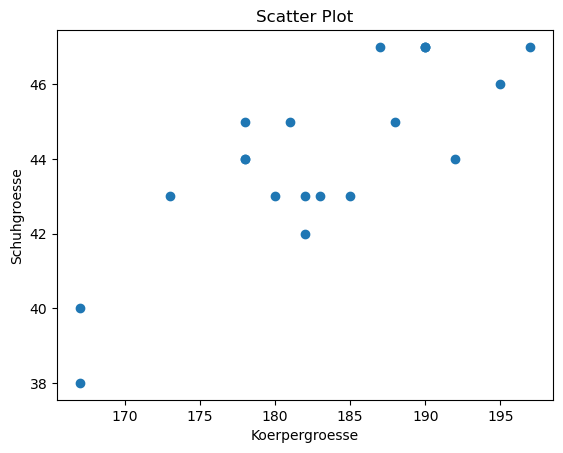

In [6]:
# Create a scatter plot
plt.scatter(x, y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Scatter Plot')
plt.show()

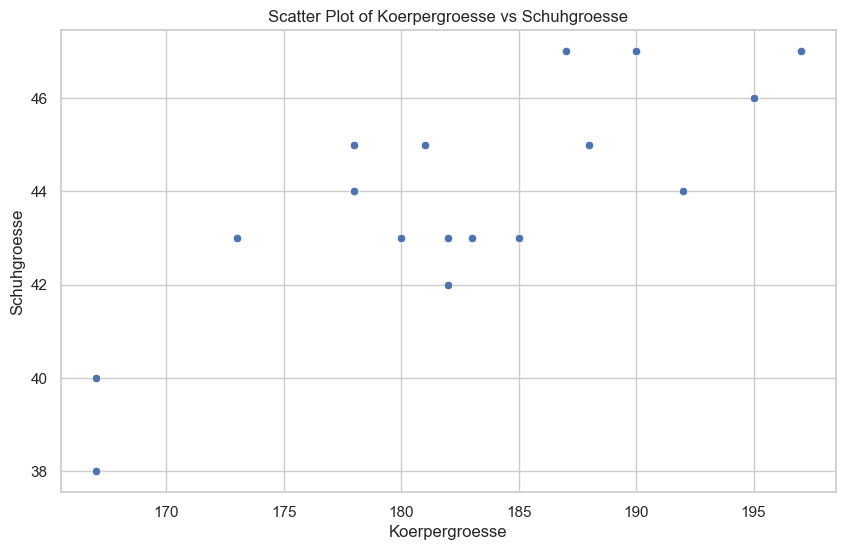

In [7]:
import seaborn as sns
sns.set(style="whitegrid")

# Scatter plot to visualize the correlation between Koerpergroesse and Schuhgroesse
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Koerpergroesse', y='Schuhgroesse', data=data)
plt.title('Scatter Plot of Koerpergroesse vs Schuhgroesse')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

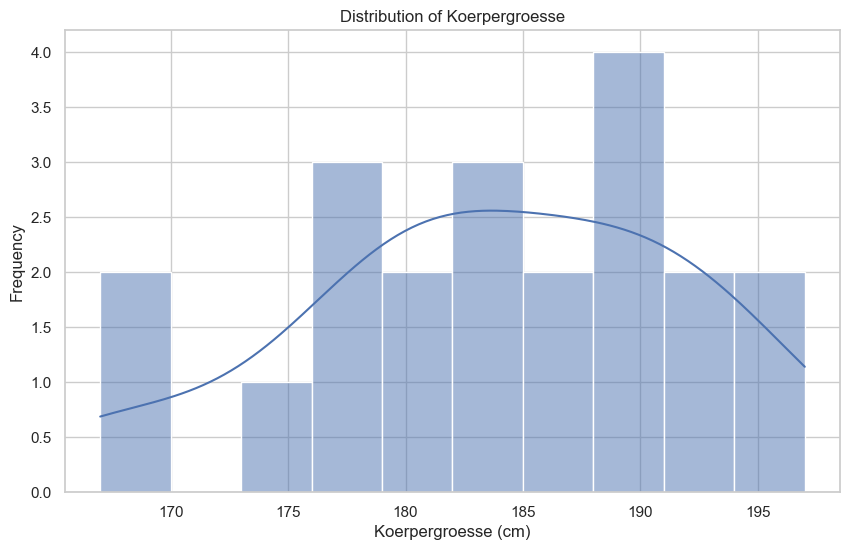

In [ ]:

# Histogram to visualize the distribution of Koerpergroesse
plt.figure(figsize=(10, 6))
sns.histplot(data['Koerpergroesse'], bins=10, kde=True)
plt.title('Distribution of Koerpergroesse')
plt.xlabel('Koerpergroesse (cm)')
plt.ylabel('Frequency')
plt.show()


In [10]:

data['Koerpergroesse'].describe()
data['Schuhgroesse'].mean()


44.15

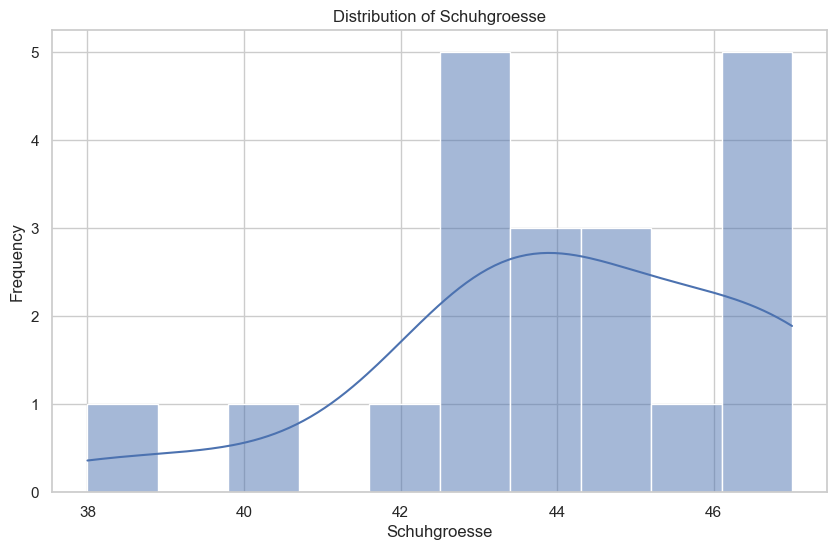

In [11]:

# Histogram to visualize the distribution of Schuhgroesse
plt.figure(figsize=(10, 6))
sns.histplot(data['Schuhgroesse'], bins=10, kde=True)
plt.title('Distribution of Schuhgroesse')
plt.xlabel('Schuhgroesse')
plt.ylabel('Frequency')
plt.show()

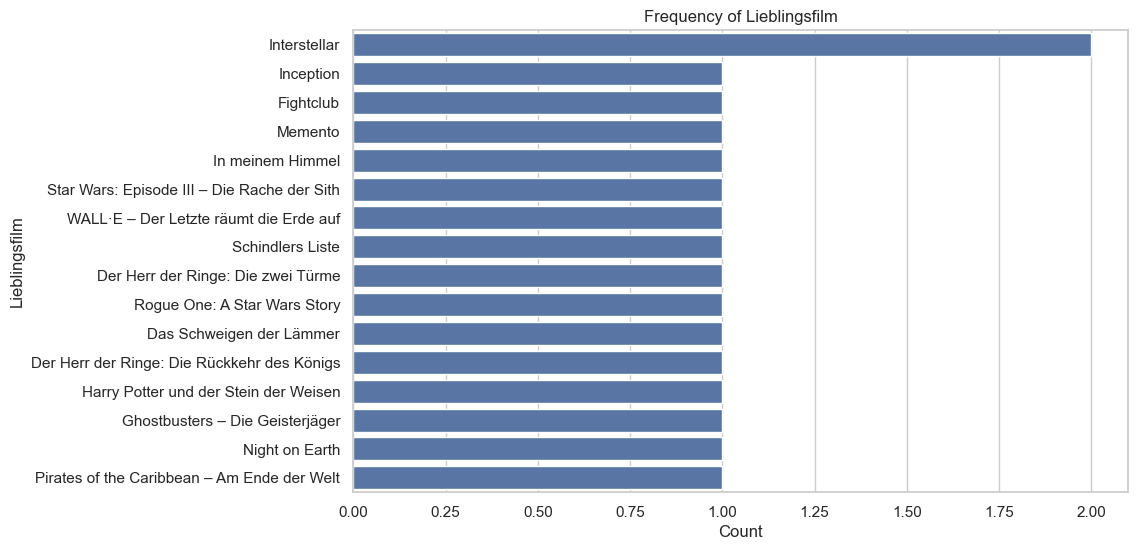

In [12]:
# Bar plot to visualize the frequency of Lieblingsfilm
plt.figure(figsize=(10, 6))
sns.countplot(y='Lieblingsfilm', data=data, order=data['Lieblingsfilm'].value_counts().index)
plt.title('Frequency of Lieblingsfilm')
plt.xlabel('Count')
plt.ylabel('Lieblingsfilm')
plt.show()

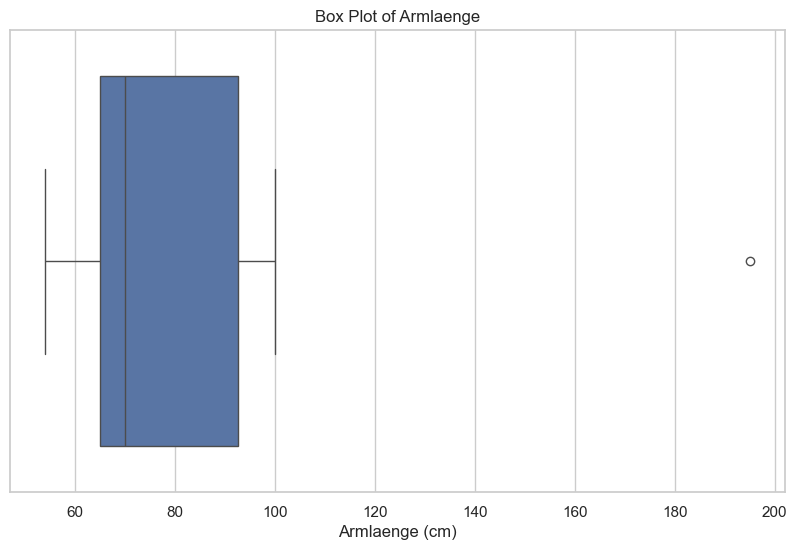

In [13]:
# Box plot to visualize the distribution of Armlaenge
plt.figure(figsize=(10, 6))
sns.boxplot(x='Armlaenge', data=data)
plt.title('Box Plot of Armlaenge')
plt.xlabel('Armlaenge (cm)')
plt.show()

### Understanding Boxplots

A boxplot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum. It can also highlight outliers in the data.

#### Components of a Boxplot:
1. **Minimum**: The smallest data point excluding outliers.
2. **First Quartile (Q1)**: The median of the lower half of the dataset (25th percentile).
3. **Median (Q2)**: The middle value of the dataset (50th percentile).
4. **Third Quartile (Q3)**: The median of the upper half of the dataset (75th percentile).
5. **Maximum**: The largest data point excluding outliers.
6. **Interquartile Range (IQR)**: The range between the first quartile (Q1) and the third quartile (Q3). It represents the middle 50% of the data.
7. **Whiskers**: Lines extending from the box to the minimum and maximum values, excluding outliers.
8. **Outliers**: Data points that fall outside the whiskers. These are typically 1.5 times the IQR above the third quartile or below the first quartile.

#### How to Interpret a Boxplot:
- The length of the box represents the IQR, indicating the spread of the middle 50% of the data.
- The line inside the box represents the median, providing a measure of central tendency.
- The whiskers show the range of the data, excluding outliers.
- Outliers are plotted as individual points beyond the whiskers.

Boxplots are useful for identifying the central tendency, variability, and skewness of the data, as well as for detecting outliers.

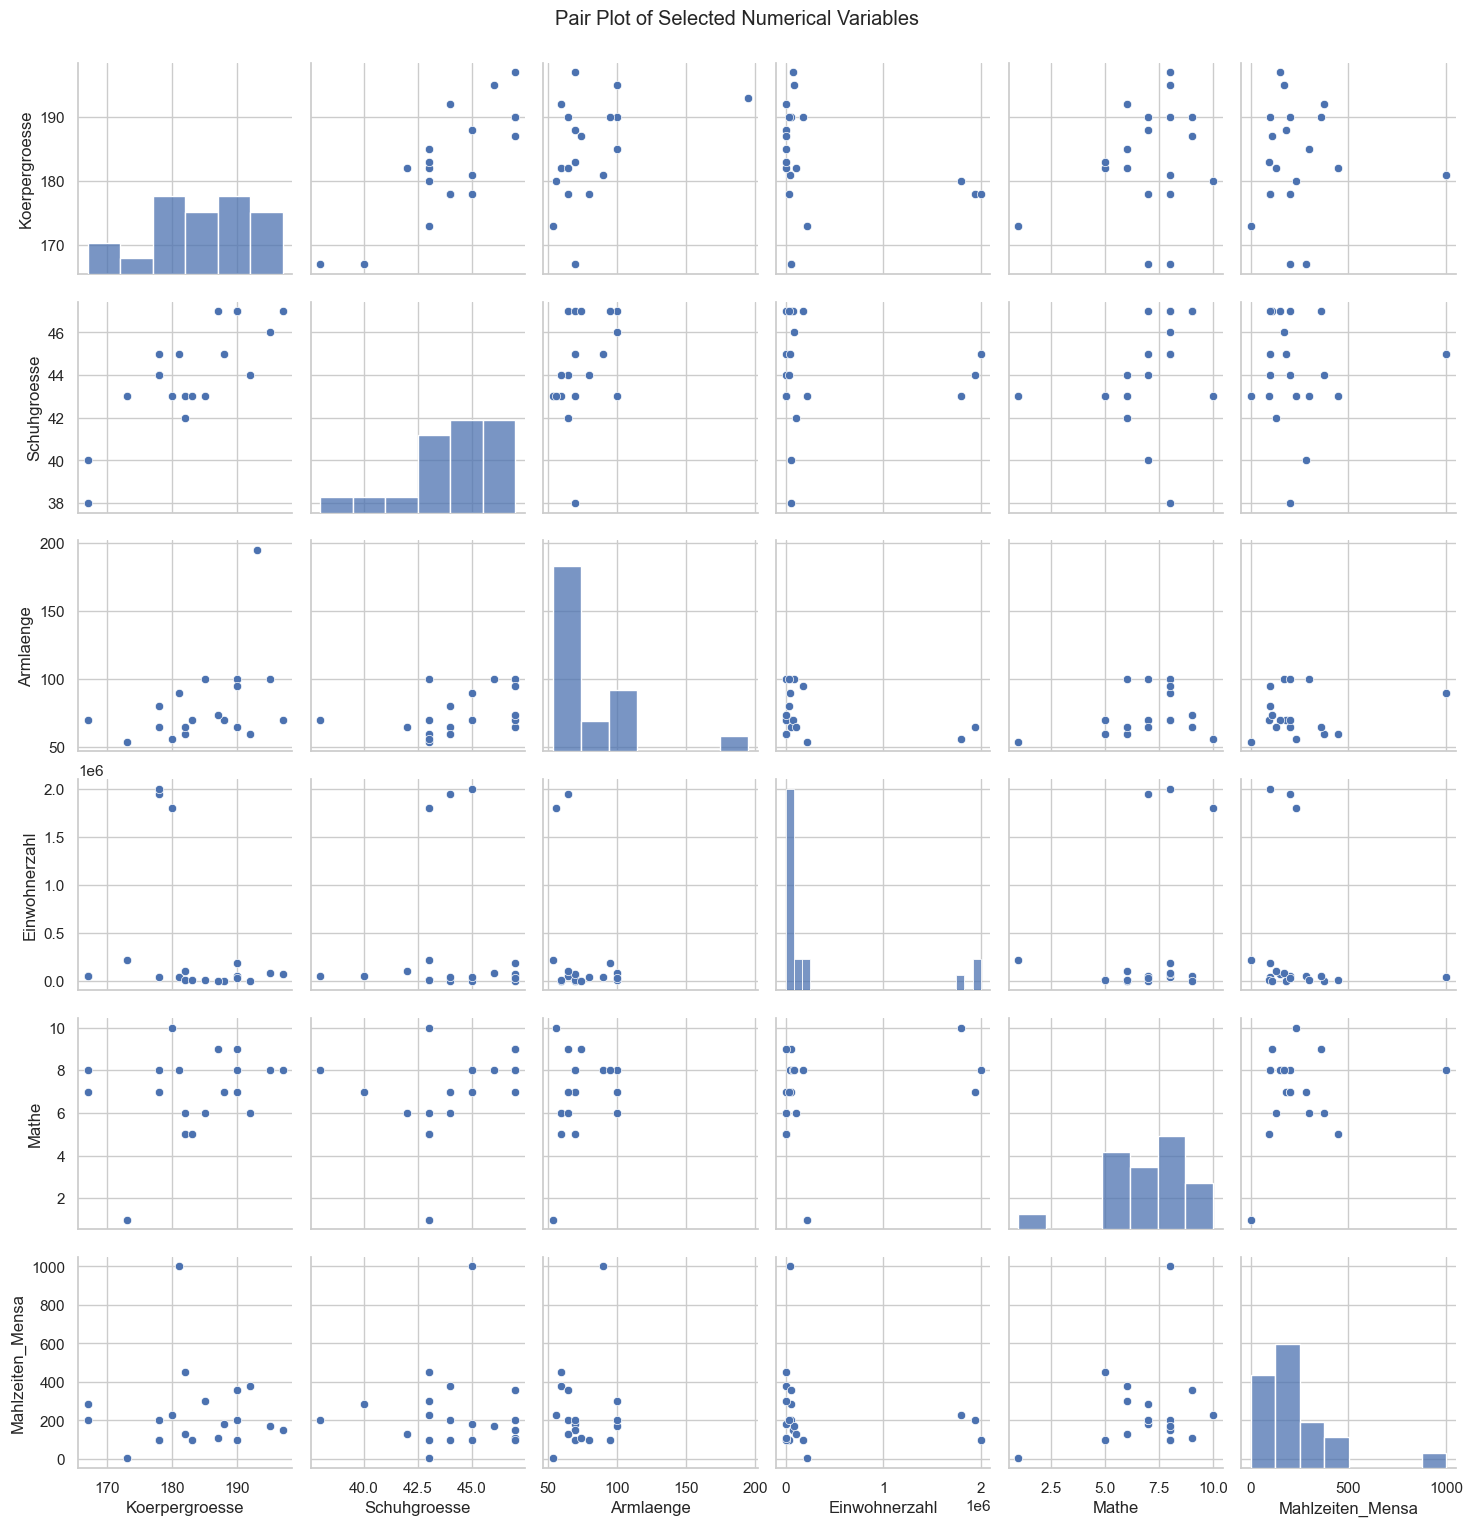

In [14]:
# Pair plot to visualize relationships between multiple pairs of variables
sns.pairplot(data[['Koerpergroesse', 'Schuhgroesse', 'Armlaenge', 'Einwohnerzahl', 'Mathe', 'Mahlzeiten_Mensa']])
plt.suptitle('Pair Plot of Selected Numerical Variables', y=1.02)
plt.show()

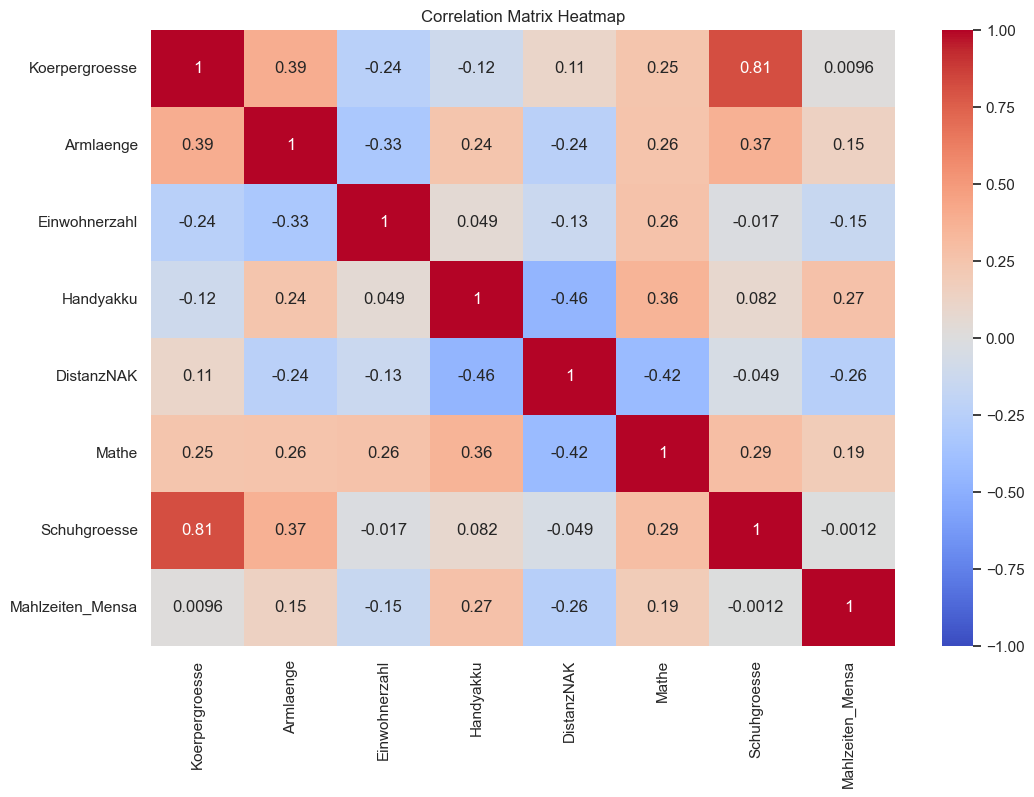

In [15]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

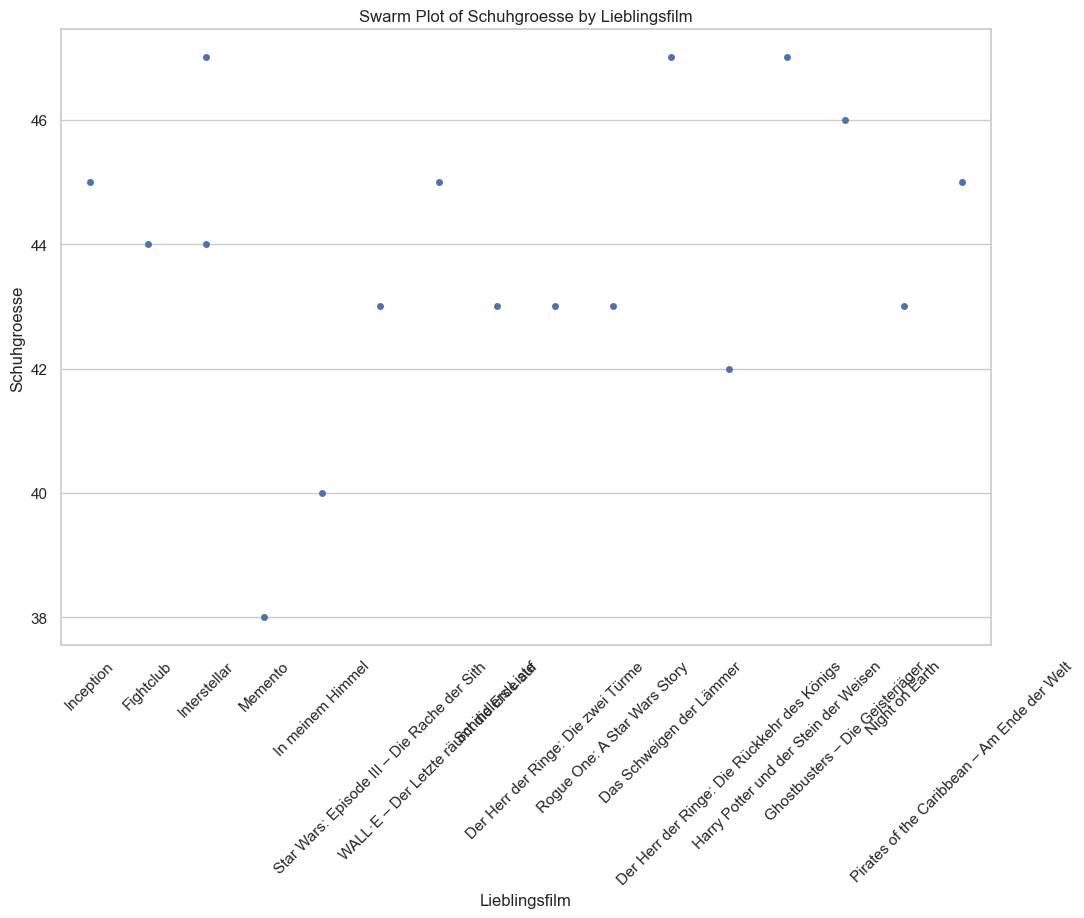

In [16]:
# Swarm plot to visualize the distribution of Schuhgroesse by Lieblingsfilm
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Lieblingsfilm', y='Schuhgroesse', data=data)
plt.title('Swarm Plot of Schuhgroesse by Lieblingsfilm')
plt.xlabel('Lieblingsfilm')
plt.ylabel('Schuhgroesse')
plt.xticks(rotation=45)
plt.show()

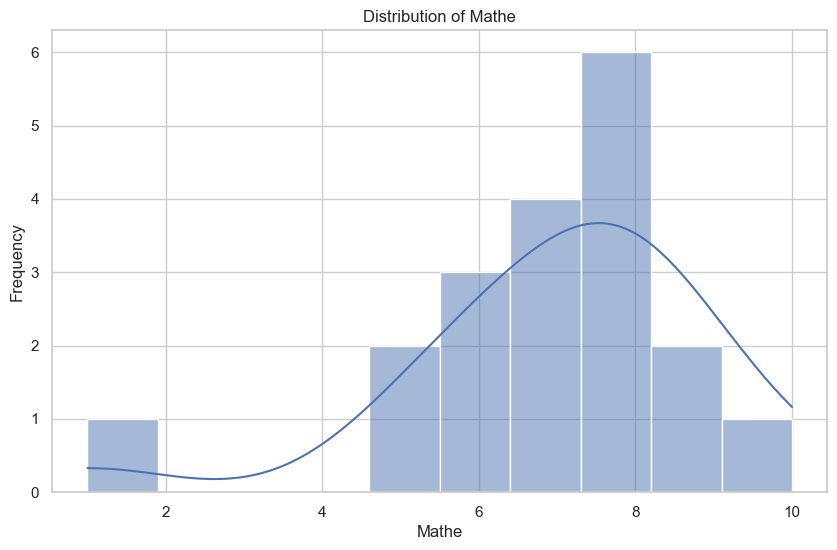

In [17]:
# Histogram to visualize the distribution of Mathe
plt.figure(figsize=(10, 6))
sns.histplot(data['Mathe'], bins=10, kde=True)
plt.title('Distribution of Mathe')
plt.xlabel('Mathe')
plt.ylabel('Frequency')
plt.show()